In [1]:
from tnreason import algorithms
from tnreason import encoding

import numpy as np


def get_sudoku_constraints(num=3):
    return {**get_column_constraints(num),
            **get_row_constraints(num),
            **get_squares_constraints(num),
            **get_position_constraints(num)}


def get_column_constraints(num=3):
    categoricalConstraints = {}
    for c1 in range(num):
        for c2 in range(num):
            for n in range(num ** 2):
                catVarKey = "col_" + str(n) + "_" + str(c1) + "_" + str(c2)
                categoricalConstraints[catVarKey] = []
                for r1 in range(num):
                    for r2 in range(num):
                        categoricalConstraints[catVarKey].append(
                            "a_" + str(r1) + "_" + str(r2) + "_" + str(c1) + "_" + str(c2) + "_" + str(n))

    return categoricalConstraints


def get_row_constraints(num=3):
    categoricalConstraints = {}
    for r1 in range(num):
        for r2 in range(num):
            for n in range(num ** 2):
                catVarKey = "row_" + str(n) + "_" + str(r1) + "_" + str(r2)
                categoricalConstraints[catVarKey] = []
                for c1 in range(num):
                    for c2 in range(num):
                        categoricalConstraints[catVarKey].append(
                            "a_" + str(r1) + "_" + str(r2) + "_" + str(c1) + "_" + str(c2) + "_" + str(n))
    return categoricalConstraints


def get_squares_constraints(num=3):
    categoricalConstraints = {}
    for r1 in range(num):
        for c1 in range(num):
            for n in range(num ** 2):
                catVarKey = "square_" + str(n) + "_" + str(r1) + "_" + str(c1)
                categoricalConstraints[catVarKey] = []
                for r2 in range(num):
                    for c2 in range(num):
                        categoricalConstraints[catVarKey].append(
                            "a_" + str(r1) + "_" + str(r2) + "_" + str(c1) + "_" + str(c2) + "_" + str(n))
    return categoricalConstraints


def get_position_constraints(num=3):
    categoricalConstraints = {}
    for r1 in range(num):
        for r2 in range(num):
            for c1 in range(num):
                for c2 in range(num):
                    catVarKey = "pos_" + str(r1) + "_" + str(r2) + "_" + str(c1) + "_" + str(c2)
                    categoricalConstraints[catVarKey] = []
                    for n in range(num ** 2):
                        categoricalConstraints[catVarKey].append(
                            "a_" + str(r1) + "_" + str(r2) + "_" + str(c1) + "_" + str(c2) + "_" + str(n))
    return categoricalConstraints


## Visualization
def evidence_to_array(evidenceDict, num, verbose=False):
    array = np.empty((num ** 2, num ** 2))
    for r1 in range(num):
        for r2 in range(num):
            for c1 in range(num):
                for c2 in range(num):
                    catVarKey = "pos_" + str(r1) + "_" + str(r2) + "_" + str(c1) + "_" + str(c2)
                    if catVarKey in evidenceDict:
                        if verbose:
                            print(
                                "Position {} known to be {}".format(
                                    str(r1) + "_" + str(r2) + "_" + str(c1) + "_" + str(c2),
                                    evidenceDict[catVarKey] + 1))
                        array[r1 * num + r2, c1 * num + c2] = evidenceDict[catVarKey] + 1
                    else:
                        array[r1 * num + r2, c1 * num + c2] = 0
    return array.astype(int)

def array_to_catEvidence(array, num, verbose=False):
    evidenceDict = {}
    rearranged = array.reshape((num,num,num,num))
    for r1 in range(num):
        for r2 in range(num):
            for c1 in range(num):
                for c2 in range(num):
                    if rearranged[r1,r2,c1,c2] != 0:
                        evidenceDict["pos_" + str(r1) + "_" + str(r2) + "_" + str(c1) + "_" + str(c2)] = rearranged[r1,r2,c1,c2] - 1
    return evidenceDict

def catEvidence_to_atomEvidence(catEvidence):
    return {"a_"+"_".join(key.split("_")[1:]) + "_" + str(catEvidence[key]) : 1  for key in catEvidence}

def atomEvidence_to_catEvidence(atomEvidence):
    return {"pos_"+"_".join(key.split("_")[1:-1]) : int(key.split("_")[-1]) for key in atomEvidence if atomEvidence[key] == 1}

In [2]:
sudoku_array = np.array([
    [0, 0, 0, 0],
    [6, 0, 0, 1],
    [0, 9, 8, 0],
    [8, 0, 0, 0],
])

evidence = array_to_catEvidence(sudoku_array, num = 2)
evidence

{'pos_0_1_0_0': 5,
 'pos_0_1_1_1': 0,
 'pos_1_0_0_1': 8,
 'pos_1_0_1_0': 7,
 'pos_1_1_0_0': 7}

In [3]:
atomEvidence = catEvidence_to_atomEvidence(evidence)

In [4]:
catEvidence = atomEvidence_to_catEvidence(atomEvidence)
catEvidence

{'pos_0_1_0_0': 5,
 'pos_0_1_1_1': 0,
 'pos_1_0_0_1': 8,
 'pos_1_0_1_0': 7,
 'pos_1_1_0_0': 7}

In [5]:
preEvidence = {
            "pos_0_1_0_0": 1,
            "pos_0_0_0_1": 0,
            "pos_0_1_1_0": 3,
            "pos_1_0_0_0": 2,
            "pos_0_0_1_0": 2
        }
preArray = evidence_to_array(preEvidence, num=2)

array_preEvidence = array_to_catEvidence(preArray, num=2)
array_preEvidence

{'pos_0_0_0_1': 0,
 'pos_0_0_1_0': 2,
 'pos_0_1_0_0': 1,
 'pos_0_1_1_0': 3,
 'pos_1_0_0_0': 2}

# Visualization

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_sudoku(sudoku,number=3):
    fig, ax = plt.subplots(figsize=(6, 6))

    # Hide axes
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)

    # Create a table
    table = plt.table(cellText=sudoku,
                      cellLoc='center',
                      loc='center',
                      cellColours=[['white']*number**2 for _ in range(number**2)],
                      colWidths=[0.1]*number**2)

    # Set font size
    table.auto_set_font_size(False)
    table.set_fontsize(14)

    # Adjust the table
    if number == 3:
      table.scale(1.01, 2.8)
    elif number == 2:
      table.scale(2.3, 6.3)
    # Draw grid lines
    for i in range(number**2+1):
        lw = 2 if i % number == 0 else 0.5
        ax.plot([0, number**2], [i, i], color='black', lw=lw)
        ax.plot([i, i], [0, number**2], color='black', lw=lw)

    plt.show()



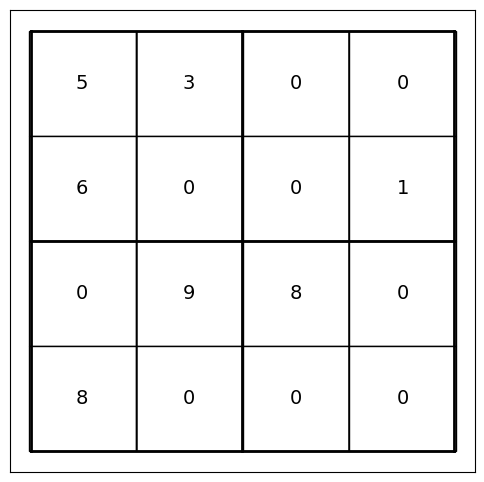

In [7]:
# Example Sudoku array (0 represents empty cells)
sudoku_array = np.array([
    [5, 3, 0, 0],
    [6, 0, 0, 1],
    [0, 9, 8, 0],
    [8, 0, 0, 0],
])

visualize_sudoku(sudoku_array, 2)

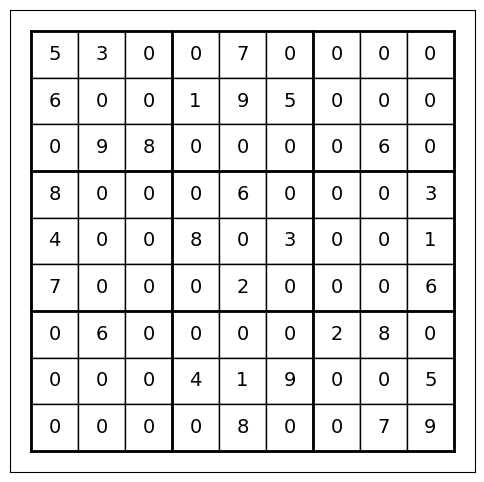

In [8]:

# Example Sudoku array (0 represents empty cells)
sudoku_array = np.array([
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
])

visualize_sudoku(sudoku_array, 3)

In [9]:
import ipywidgets as widgets
from IPython.display import display, HTML
import numpy as np

def create_sudoku_widget(number=3):
    # Create a 9x9 grid of text inputs
    grid = [[widgets.BoundedIntText(min=0, max=number**2, layout=widgets.Layout(width='40px', height='40px')) for _ in range(number**2)] for _ in range(number**2)]

    # Display the grid
    grid_box = widgets.GridBox(children=[item for sublist in grid for item in sublist],
                               layout=widgets.Layout(grid_template_columns='repeat({}, 40px)'.format(number**2)))

    display(grid_box)

    # Function to gather inputs into a numpy array
    def get_sudoku_array():
        return np.array([[cell.value for cell in row] for row in grid])

    return get_sudoku_array

get_sudoku_array = create_sudoku_widget(number=2)

# Button to display the current Sudoku array
def display_sudoku_array(b):
    sudoku_array = get_sudoku_array()

display_button = widgets.Button(description="Display Sudoku Array")
display_button.on_click(display_sudoku_array)
display(display_button)


GridBox(children=(BoundedIntText(value=0, layout=Layout(height='40px', width='40px'), max=4), BoundedIntText(v…

Button(description='Display Sudoku Array', style=ButtonStyle())

In [10]:
get_sudoku_array()

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

# Sudoku of size (2x2)x(2x2)

## Example

In [11]:
num = 2
structureCores = encoding.create_categorical_cores(get_sudoku_constraints(num=num))
preEvidence = {
            "a_0_1_0_0_1": 1,
            "a_0_0_0_1_0": 1,
            "a_0_1_1_0_3": 1,
            "a_1_0_0_0_2": 1,
            "a_0_0_1_0_2": 1
        }
propagator = algorithms.ConstraintPropagator(
            {**structureCores,
             **encoding.create_evidence_cores(preEvidence)},
            verbose=False
        )
propagator.propagate_cores()
assignmentDict = propagator.find_assignments()

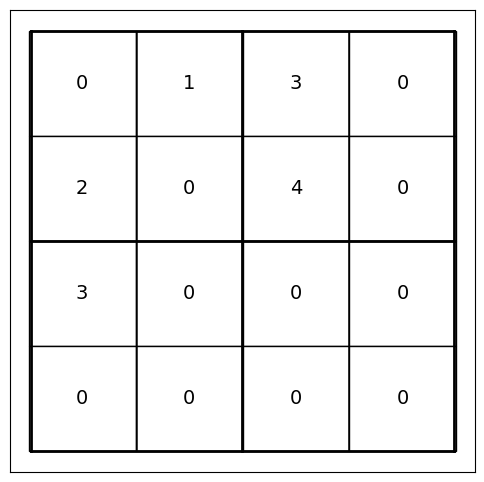

In [12]:
preArray = evidence_to_array(atomEvidence_to_catEvidence(preEvidence), num=2)
visualize_sudoku(preArray, 2)

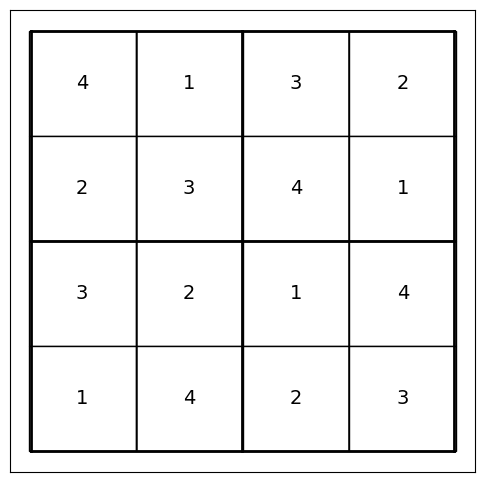

In [13]:
array = evidence_to_array(assignmentDict, 2)
visualize_sudoku(array, 2)

## Custom Sudoku

In [14]:
inputWidget = create_sudoku_widget(number=2)

GridBox(children=(BoundedIntText(value=0, layout=Layout(height='40px', width='40px'), max=4), BoundedIntText(v…

In [15]:
array = inputWidget()
array

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [16]:
preEvidence = catEvidence_to_atomEvidence(array_to_catEvidence(array, num=2))
preEvidence

{}

In [17]:
propagator = algorithms.ConstraintPropagator(
            {**encoding.create_categorical_cores(get_sudoku_constraints(num=num)),
             **encoding.create_evidence_cores(preEvidence)},
            verbose=False
        )
propagator.propagate_cores()
assignmentDict = propagator.find_assignments()

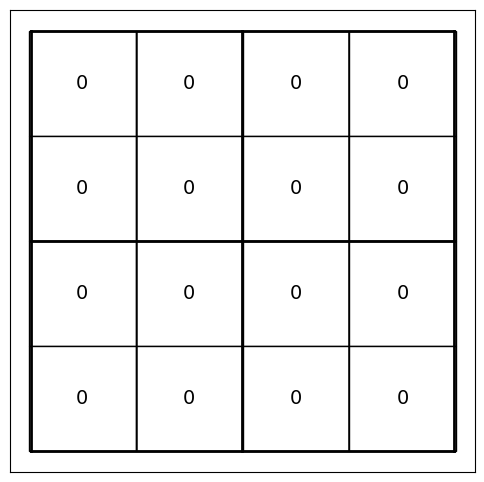

In [18]:
result = evidence_to_array(assignmentDict, 2)
visualize_sudoku(result, 2)

# Standard size of (3x3)x(3x3)

## Example

In [19]:
num = 3
structureCores = encoding.create_categorical_cores(get_sudoku_constraints(num=num))
preEvidence = {
            "a_0_1_0_0_1": 1,
            "a_0_0_0_1_0": 1,
            "a_0_1_1_0_3": 1,
            "a_1_0_0_0_2": 1,
            "a_0_0_1_0_2": 1
        }
propagator = algorithms.ConstraintPropagator(
            {**structureCores,
             **encoding.create_evidence_cores(preEvidence)},
            verbose=False
        )
propagator.propagate_cores()
assignmentDict = propagator.find_assignments()

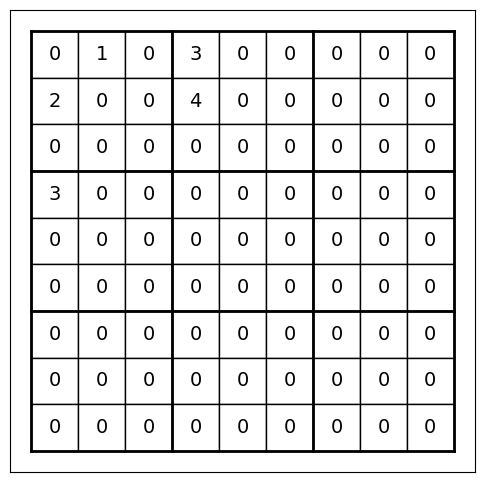

In [20]:
visualize_sudoku(evidence_to_array(assignmentDict, 3), number=3)

## Custom Sudoku

In [21]:
inputWidget = create_sudoku_widget(number=3)

GridBox(children=(BoundedIntText(value=0, layout=Layout(height='40px', width='40px'), max=9), BoundedIntText(v…

In [22]:
array = inputWidget()
array

array([[0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [23]:
preEvidence = catEvidence_to_atomEvidence(array_to_catEvidence(array, num=3))
preEvidence

{}

In [24]:
propagator = algorithms.ConstraintPropagator(
            {**encoding.create_categorical_cores(get_sudoku_constraints(num=3)),
             **encoding.create_evidence_cores(preEvidence)},
            verbose=False
        )
propagator.propagate_cores()
assignmentDict = propagator.find_assignments()

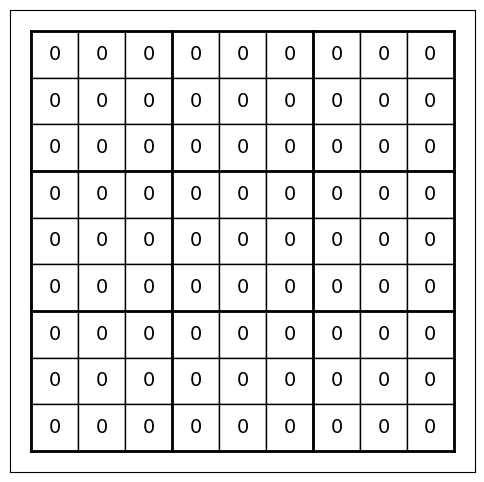

In [25]:
result = evidence_to_array(assignmentDict, 3)
visualize_sudoku(result, 3)